In [210]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [212]:
df = pd.read_csv("C:\\Users\\anupa\\Desktop\\Jupyter & Python\\RM\\Linear Regression\\linear_regression_dataset.csv")

# Separating Y in trainig set and converting it to a np array of size (500,1)
data_Ytraining = df.loc[:, 'TOTCHG']
arr_Ytraining = data_Ytraining.to_numpy()

# Separating X in trainig set and converting it to a np array of size (500,5)
data_Xtraining = df.drop('TOTCHG', axis=1)
arr_Xtraining = data_Xtraining.to_numpy()

In [214]:
def mean_normalization(x):
    # Calculating mean in a np array 'x' along axis 0 while excluding/ignoring NaN values
    avg_value = np.nanmean(x, axis=0) 
    # Calculating max in a np array 'x' along axis 0 while excluding/ignoring NaN values
    max_value = np.nanmax(x, axis=0)
    # Calculating min in a np array 'x' along axis 0 while excluding/ignoring NaN values
    min_value = np.nanmin(x, axis=0)
    # Calculating norm in a np array 'x' along axis 0
    x_norm = (x - avg_value) / (max_value - min_value)
    return x_norm

'''
arr_Xtraining_scaled = mean_normalization(arr_Xtraining)
arr_Ytraining_scaled = mean_normalization(arr_Ytraining)
#print(arr_Ytraining_scaled)
#print(arr_Xtraining_scaled)
'''

'\narr_Xtraining_scaled = mean_normalization(arr_Xtraining)\narr_Ytraining_scaled = mean_normalization(arr_Ytraining)\n#print(arr_Ytraining_scaled)\n#print(arr_Xtraining_scaled)\n'

In [216]:
def Zscore_normalization(x):
    # Calculating mean in a np array 'x' along axis 0 while excluding/ignoring NaN values
    avg_value = np.nanmean(x, axis=0) 
    # Calculating std in a np array 'x' along axis 0 while excluding/ignoring NaN values
    std_value = np.nanstd(x,axis=0)
    # Calculating normalized np array for 'x' 
    x_norm = (x - avg_value) / std_value
    return x_norm


arr_Xtraining_scaled = Zscore_normalization(arr_Xtraining)
arr_Ytraining_scaled = Zscore_normalization(arr_Ytraining)
#print(arr_Ytraining_scaled)
#print(arr_Xtraining_scaled)


In [218]:
b_i = 0.0 # Initialize b (intercept)
w_i = np.zeros(arr_Xtraining_scaled.shape[1]) # Initialize w (vector of x)
alpha = 0.01 # Learning rate
num_iters = 1000 # Number of iterations to try to reach minima

In [220]:
def predict_Y(x, w, b): 
    return np.dot(x, w) + b  

In [222]:
def CF_op(x, y, w, b):
    m = x.shape[0] # Givivng m the value of number of iterations i.e. 500
    cost=0.0 # Initializing CF
    # Loop to calculate the CF
    for i in range (m):
        J_wb= ((np.dot(x[i],w)+b)-y[i])**2
        cost+=J_wb
    cost=cost/(2*m)
    return cost

In [224]:
def find_Dparams(x, y, w, b):
    # Givivng m the value of number of iterations i.e. 500 and n the value of number of dimensions of x since we need a w for each x
    m, n = x.shape  
    # Initailizing the array of change(derivative) in w for each x
    dj_dw = np.zeros(n)
    # Initializing change(derivative) in b
    dj_db = 0.0

    # Replace NaN values with median
    a = np.nanmedian(x, axis=0)
    for i in range(m):
        for j in range(n):
            if math.isnan(x[i, j]):
                x[i, j] = a[j]    
                
    # Calculation of the change in params(w and b)
    for i in range(m):
        error = (np.dot(x[i], w) + b) - y[i]
        dj_dw += error * x[i]
        dj_db += error
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

def GD_op(x, y, w, b, alpha, num_iters):
    gd = []
    for i in range(num_iters):
        dj_dw, dj_db = find_Dparams(x, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i < 10000000:
            gd.append(CF_op(x, y, w, b))

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i}: Cost: {gd[-1]}")

    return w, b

In [226]:
'''y=find_Dparams(arr_Xtraining_scaled, arr_Ytraining_scaled, w_i, b_i)
y'''

'y=find_Dparams(arr_Xtraining_scaled, arr_Ytraining_scaled, w_i, b_i)\ny'

In [228]:
w_f, b_f = GD_op(arr_Xtraining_scaled, arr_Ytraining_scaled, w_i, b_i, alpha, num_iters)

print(f"W final: {w_f}")
print(f"B final: {b_f}")

Iteration 0: Cost: 0.49483920956954963
Iteration 100: Cost: 0.26592740426217515
Iteration 200: Cost: 0.23023906424901858
Iteration 300: Cost: 0.22436134996614338
Iteration 400: Cost: 0.22335252630420704
Iteration 500: Cost: 0.22317361419375253
Iteration 600: Cost: 0.22314102932532706
Iteration 700: Cost: 0.2231349626930739
Iteration 800: Cost: 0.22313381190454254
Iteration 900: Cost: 0.22313358997868057
W final: [ 0.24058291 -0.0501883   0.64275256 -0.02810058 -0.35722683]
B final: -8.52415766896852e-06


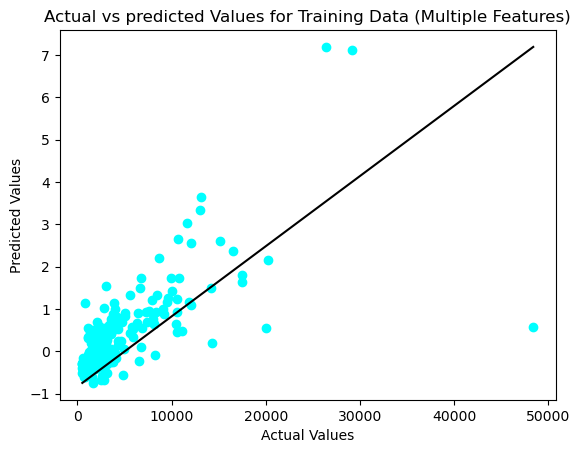

In [229]:
arr_Ypredicted = predict_Y(arr_Xtraining_scaled, w_f, b_f)
# Scatter plot of actual vs predicted values
plt.scatter(arr_Ytraining, arr_Ypredicted, color="cyan", label="Training Data")
# Plot ideal fit line
plt.plot([min(arr_Ytraining), max(arr_Ytraining)], [min(arr_Ypredicted), max(arr_Ypredicted)], color="black", linestyle="-")
plt.xlabel("Actual Values") #X-axis Label
plt.ylabel("Predicted Values") #Y-axis Label
plt.title("Actual vs predicted Values for Training Data (Multiple Features)") #Title
plt.show() #Output graph